# 2. Arthemetic Operations on Images

## Goal
* Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.
* You will learn these functions : cv2.add(), cv2.addWeighted() etc.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv

## Image Addition

In [3]:
# pixel addition overflows with uint8 as the range of piexel is represented by 0-255
x = np.uint8([250])
y = np.uint8([10])

# modulus operation in Numpy
print(x+y) # 250+10 = 260 % 256 = 4

# satured operation in OpenCV
print(cv.add(x,y)) # 250+10 = 260 => 255

[4]
[[255]]


## Image Blending

This is also image addition but different weights are assigned to different images so that it gives a feeling of blending or transparency. Images are added as per the equation below:

$$g(x) = (1 - \alpha)f_0(x) + \alpha f_1(x)$$

By varying $\alpha$ from 0 $\rightarrow$ 1, you can perform a cool transition between one image to another.

Here I took two images to blend them together. First image is given a weight of 0.7 and second image is given 0.3. cv2.addWeighted() applies following equation on the image.

$$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$$

Here $\gamma$ is taken as zero.



original shapes are:  (342, 548, 3) (124, 223, 3)
after resize:  (124, 223, 3) (124, 223, 3)


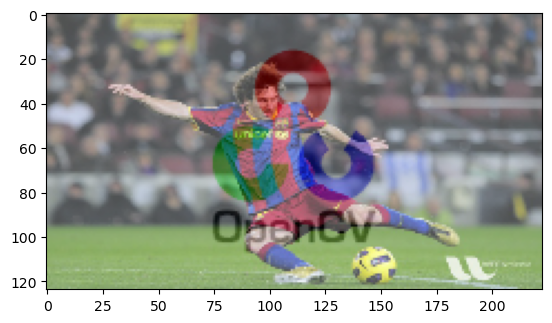

In [4]:
img1 = cv.imread('messi5.jpg')
img2 = cv.imread('opencv-logo.png')

print("original shapes are: ", img1.shape, img2.shape)

# In opencv, x is the width and y axis is the height, therefore, shape is (height, width, channels)
img1_resized = cv.resize(img1, img2.shape[:2][: : -1])

print("after resize: ", img1_resized.shape, img2.shape)

# add two images with the same size
dst = cv.addWeighted(img1_resized, 0.7, img2, 0.3, 0)

plt.imshow(dst[:,:,::-1])


## Bitwise Operations

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:

In [16]:
# load two images
img1 = cv.imread('messi5.jpg')
img2 = cv.imread('opencv-logo.png')

# put logo on top-left corner, create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# create a mask of logo and create its inverse mask
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# create a binary image with only two values: 0 and 255: any value below 10 is considered 0 and any value above 10 is considered 255
# the original image is while background with colorful logo, we want a mask that the logo is white and the background is black
ret, mask = cv.threshold(img2gray, 200, 255, cv.THRESH_BINARY_INV)
# mask inverse is the opposite of mask, where in this case the logo is black and the background is white 
# when apply this inverse mask 
mask_inv = cv.bitwise_not(mask)

# black-out the area of logo in ROI: set the ROI area to black
# bitwise of the two same image is the image itself
# with mask, if mask is 0, then the result is 0, if mask is 255, then the result is the original image
# get background of image1
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# take only region of logo from logo image
# get forground of image2 
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

cv.imshow("img2_original", img2)
#cv.imshow("roi", img1)
cv.imshow("gray", img2gray)
cv.imshow("mask", mask)
cv.imshow("mask_inv", mask_inv)
cv.imshow("img1_bg", img1_bg)
cv.imshow("img2_fg", img2_fg)
cv.imshow('img1', img1)
# wait for any key to exit
cv.waitKey(0)
cv.destroyAllWindows()
